In [1]:
import pytraj as pt
from matplotlib import pyplot as plt
import seaborn as snb
import nglview

In [2]:
traj = pt.load('traj.dcd', 'AlanineDipeptideOpenMM/vacuum.pdb')
print (traj)
print([res.name for res in traj.top.residues])

nglview.show_pytraj(traj)

pytraj.Trajectory, 2001 frames: 
Size: 0.000984 (GB)
<Topology: 22 atoms, 3 residues, 1 mols, non-PBC>
           
['ACE', 'ALA', 'NME']


NGLWidget(max_frame=2000)

In [3]:
phi_psi = pt.multidihedral(traj, resrange=[1,], dihedral_types='psi phi', dtype='dataframe')
phi_psi.head(6)

,phi_2,psi_2
0,180.000000,180.000000
1,-179.158258,179.816590
2,-177.971329,178.826983
3,-176.798208,177.325580
4,-176.174759,176.299724
5,-175.978337,175.669522


/home/wei/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


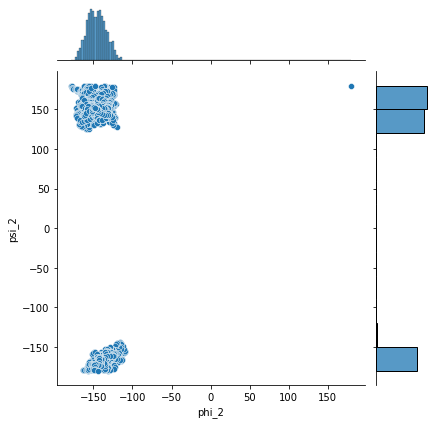

In [4]:
snb.jointplot(phi_psi['phi_2'], phi_psi['psi_2'], kind='scatter')
#plt.savefig('phipsi.png')

In [5]:
ref_from_pdb = pt.load('AlanineDipeptideOpenMM/vacuum.pdb')
ref_from_pdb


pytraj.Trajectory, 1 frames: 
Size: 0.000000 (GB)
<Topology: 22 atoms, 3 residues, 1 mols, non-PBC>
           

(2001,)


Text(0, 0.5, 'RMSD (angstrom)')

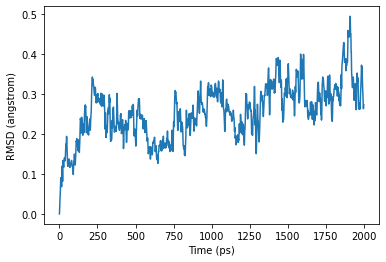

In [7]:
rmsd_to_ref = pt.rmsd(traj, ref=ref_from_pdb, mask='@N,CA,C')
print (rmsd_to_ref.shape)
plt.plot(rmsd_to_ref)
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (angstrom)')